<a href="https://colab.research.google.com/github/LSSTDESC/bayesian-pipelines-pixels/blob/u%2Fim%2Fbliss-demo/notebooks/bliss_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install BPTT and BLISS

In [ ]:
# for galsim that needs fftw
!apt-get install libfftw3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 5 newly installed, 0 to remove and 21 not upgraded.
Need to get 3,766 kB of archives.
After this operation, 21.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-quad3 amd64 3.3.7-1 [552 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-single3 amd64 3.3.7-1 [764 kB]
Get:4 http://archive.ubuntu.com/ubuntu bioni

In [ ]:
!pip install git+https://github.com/LSSTDESC/bayesian-pipelines-pixels.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LSSTDESC/bayesian-pipelines-pixels.git to /tmp/pip-req-build-lqin09d7
  Running command git clone --filter=blob:none --quiet https://github.com/LSSTDESC/bayesian-pipelines-pixels.git /tmp/pip-req-build-lqin09d7
  Resolved https://github.com/LSSTDESC/bayesian-pipelines-pixels.git to commit 8e7e2cb130e49b9d603e5c4d5964a5021548da69
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 KB 25.8 MB/s eta 0:00:00
  Created wheel for bayes-pipelines-pixels: filename=bayes_pipelines_pixels-0.0.1-py

In [ ]:
!pip install bliss-deblender

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 KB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 70.9 MB/s eta 0:00:00
     ━━━━━━━━

# Setup

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from bpp.catalog import create_uniform_catalog
from bpp.psf import get_gaussian_psf
from bpp.cutouts import create_gaussian_cutouts

import galcheat
from galcheat.utilities import mag2counts, mean_sky_level

import numpy as np

# Check GPU is available

In [ ]:
import torch

In [ ]:
torch.cuda.device_count()

1

In [ ]:
device = torch.device("cuda:0")

In [ ]:
!nvidia-smi

Tue Jan 10 16:02:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Create dataset for training

In [ ]:
import torch

from bpp.cutouts import create_gaussian_cutouts
from bpp.psf import get_gaussian_psf
from bpp.catalog import create_uniform_catalog

from bliss.catalog import FullCatalog

In [ ]:
pixel_scale = 0.2
lsst = galcheat.get_survey("LSST")
r_filter = lsst.get_filter("r")
sky_level: float = mean_sky_level(lsst, r_filter).to_value("electron")

In [ ]:
psf = get_gaussian_psf(fwhm=0.7)

In [ ]:
batches = []
full_cats = []
n_batches = 10
batch_size = 32
slen = 40 
tile_slen = 4
bp = 4 # ptile_slen = tile_slen + bp*2 = 12
size = slen + bp*2
seed = 2
for i in range(n_batches):
	cat = create_uniform_catalog(n_rows=batch_size)
	cutouts = create_gaussian_cutouts(slen=size, catalog=cat, 
					psf=psf, pixel_scale=pixel_scale, g1=0, g2=0, 
					sky_level=sky_level, seed=seed)
	# get parameters from cat into bliss format
	n_sources = torch.ones([batch_size]) # assume 1 galaxy in every stamp
	plocs_y = cat['ra'] / pixel_scale  + slen/2
	plocs_x = cat['dec'] / pixel_scale + slen/2
	plocs = np.hstack([plocs_x.reshape(-1, 1), plocs_y.reshape(-1, 1)])
	plocs = torch.from_numpy(plocs).reshape(batch_size, 1, 2).float()
	star_bools = torch.zeros([batch_size, 1, 1]).float()
	star_log_fluxes = torch.zeros([batch_size, 1, 1]).float()
	galaxy_bools = torch.ones([batch_size, 1, 1]).float()

	# put into full catalog 
	d = {'n_sources': n_sources, 'plocs': plocs, 'star_bools': star_bools, 
      'galaxy_bools': galaxy_bools, 'star_log_fluxes': star_log_fluxes}
	full_cat = FullCatalog(slen, slen, d)

	# convert to tile catalog
	tile_cat = full_cat.to_tile_params(tile_slen, 1)

	# specify images and background value
	# reshape
	images = torch.from_numpy(cutouts.reshape(batch_size, 1, size, size)).to(torch.float)
	background = torch.tensor([sky_level]).expand(batch_size, 1, size, size).to(torch.float)

	# put all into one dictionary 
	batch = {'images': images, 'background': background, 
		**tile_cat.to_dict()
		} 
	
	full_cats.append(full_cat)
	batches.append(batch)

## Check locs are corretly formatted

In [ ]:
full_cats[0].plocs.shape

torch.Size([32, 1, 2])

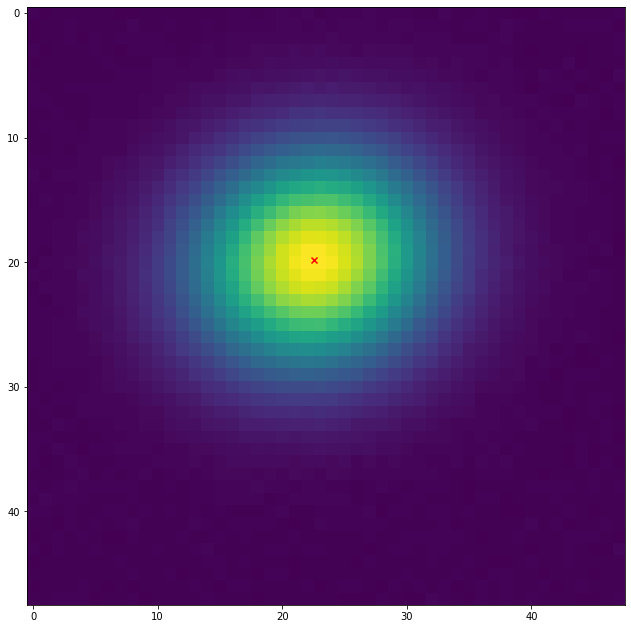

In [ ]:
i, j = np.random.randint(n_batches), np.random.randint(batch_size)
# i,j = 1, 1÷
plt.figure(figsize=(11,11))
plt.imshow(batches[i]['images'][j,0])
x = full_cats[i].plocs[j,0,1].item() - 0.5 + bp
y = full_cats[i].plocs[j,0,0].item() - 0.5 + bp 
plt.scatter(x, y, marker='x', color='r')

## Create dataset class 


In [ ]:
from typing import List, Dict

from torch import Tensor
import pytorch_lightning as pl
from torch.utils.data import DataLoader, Dataset

In [ ]:
class SavedBatches(pl.LightningDataModule, Dataset):
  def __init__(self, train_batches: List[Dict[str,Tensor]]): 
    super().__init__()
    self.train_batches = train_batches

  def train_dataloader(self):
    return DataLoader(self.train_batches, batch_size=None, num_workers=0)


In [ ]:
dm = SavedBatches(batches) # datamodule to be passed into trainer

# Setup BLISS model

In [ ]:
from bliss.models.detection_encoder import DetectionEncoder
from bliss.models.encoder_layers import ConcatBackgroundTransform

In [ ]:
# model for detections in BLISS
transform = ConcatBackgroundTransform()
model = DetectionEncoder(input_transform=transform, max_detections=1, n_bands=1, tile_slen=4, 
                        ptile_slen=12, channel=8, dropout=0, spatial_dropout=0, hidden=128, 
                        optimizer_params={'lr':1e-4} # use Adam optimizer with 1e-4 learning rate.
                        )

# Training

In [ ]:
import pytorch_lightning as pl
trainer = pl.Trainer(max_epochs=10, accelerator='gpu', devices=1, 
                     check_val_every_n_epoch= 101, # no validdation
                     logger=False 
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# train!
trainer.fit(model, datamodule=dm)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                   | Type             | Params
------------------------------------------------------------
0 | enc_conv               | EncoderCNN       | 68.8 K
1 | enc_final              | Sequential       | 55.0 K
2 | log_softmax            | LogSoftmax       | 0     
3 | val_detection_metrics  | DetectionMetrics | 0     
4 | test_detection_metrics | DetectionMetrics | 0     
------------------------------------------------------------
123 K     Trainable params
0         Non-trainable params
123 K     Total params
0.495     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.
